In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline


# Demo for COV and PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, FloatSlider
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

def generate_data(var_x, var_y, cov_xy):
    mean = [0, 0]
    cov_matrix = [[var_x, cov_xy], [cov_xy, var_y]]
    data = np.random.multivariate_normal(mean, cov_matrix, 300)
    return data, cov_matrix

def plot_ellipse(ax, data):
    cov = np.cov(data.T)
    eigvals, eigvecs = np.linalg.eigh(cov)
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 4 * np.sqrt(eigvals)
    ellipse = Ellipse(xy=np.mean(data, axis=0), width=width, height=height, 
                      angle=angle, edgecolor='b', facecolor='none', linewidth=2)
    ax.add_patch(ellipse)

def plot_pca(var_x, var_y, cov_xy):
    data, cov_matrix = generate_data(var_x, var_y, cov_xy)
    pca = PCA(n_components=2)
    pca.fit(data)
    transformed_data = pca.transform(data)
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 5))
    
    # Covariance Matrix Heatmap
    sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[0])
    axes[0].set_title("Covariance Matrix")
    
    # Original Data with Ellipse
    axes[1].scatter(data[:, 0], data[:, 1], alpha=0.5, label='Original Data')
    plot_ellipse(axes[1], data)
    for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
        axes[1].arrow(0, 0, comp[0] * var, comp[1] * var, color=['r', 'g'][i], width=0.05)
    axes[1].set_title("Before PCA (Original Data)")
    axes[1].legend()
    
    
    plt.show()

interact(plot_pca, 
         var_x=FloatSlider(min=0, max=1.0, step=0.1, value=1.0, description='Variance X'),
         var_y=FloatSlider(min=0, max=1.0, step=0.1, value=1.0, description='Variance Y'),
         cov_xy=FloatSlider(min=-1, max=1.0, step=0.1, value=1.0, description='Covariance XY'))

interactive(children=(FloatSlider(value=1.0, description='Variance X', max=1.0), FloatSlider(value=1.0, descri…

<function __main__.plot_pca(var_x, var_y, cov_xy)>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

def generate_data(var_x, var_y, var_z, cov_xy, cov_xz, cov_yz):
    mean = [0, 0, 0]
    cov_matrix = [[var_x, cov_xy, cov_xz], [cov_xy, var_y, cov_yz], [cov_xz, cov_yz, var_z]]
    data = np.random.multivariate_normal(mean, cov_matrix, 300)
    return data

def plot_pca(var_x, var_y, var_z, cov_xy, cov_xz, cov_yz):
    data = generate_data(var_x, var_y, var_z, cov_xy, cov_xz, cov_yz)
    pca = PCA(n_components=3)
    pca.fit(data)
    
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], alpha=0.5, label='Original Data')
    
     # Introduce scaling factor to make vectors longer
    scale_factor = 3  # Adjust this value to make vectors longer
    for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
        ax.quiver(0, 0, 0, comp[0] * var * scale_factor, comp[1] * var * scale_factor, comp[2] * var * scale_factor, 
                  color=['orange', 'r', 'b'][i], linewidth=3)
    
    ax.set_title("PCA Components in 3D Data")
    plt.show()

interact(plot_pca, 
         var_x=FloatSlider(min=0, max=1.0, step=0.1, value=0.2, description='Variance X'),
         var_y=FloatSlider(min=0, max=1.0, step=0.1, value=0.4, description='Variance Y'),
         var_z=FloatSlider(min=0, max=1.0, step=0.1, value=0.5, description='Variance Z'),
         cov_xy=FloatSlider(min=-1, max=1.0, step=0.1, value=0.5, description='Covariance XY'),
         cov_xz=FloatSlider(min=-1, max=1.0, step=0.1, value=0.7, description='Covariance XZ'),
         cov_yz=FloatSlider(min=-1, max=1.0, step=0.1, value=-0.1, description='Covariance YZ'))

interactive(children=(FloatSlider(value=0.2, description='Variance X', max=1.0), FloatSlider(value=0.4, descri…

<function __main__.plot_pca(var_x, var_y, var_z, cov_xy, cov_xz, cov_yz)>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

def generate_data(var_x, var_y, var_z, cov_xy, cov_xz, cov_yz):
    mean = [0, 0, 0]
    cov_matrix = [[var_x, cov_xy, cov_xz], 
                  [cov_xy, var_y, cov_yz], 
                  [cov_xz, cov_yz, var_z]]
    data = np.random.multivariate_normal(mean, cov_matrix, 300)
    return data

def plot_pca(var_x, var_y, var_z, cov_xy, cov_xz, cov_yz):
    data = generate_data(var_x, var_y, var_z, cov_xy, cov_xz, cov_yz)
    pca = PCA(n_components=3)
    pca.fit(data)
    
    # Transform data into 2D using PCA
    transformed_data_2d = pca.transform(data)  # Projecting data onto first 2 principal components
    
    # Transform data into 1D using PCA
    transformed_data_1d = pca.transform(data)[:, 0]  # Projecting data onto the first principal component
    
    # Create figure and subplots
    fig = plt.figure(figsize=(18, 6))
    
    # 3D Plot of original data and PCA components
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.scatter(data[:, 0], data[:, 1], data[:, 2], alpha=0.5, label='Original Data')
    
    scale_factor = 3  # Adjust this value to make vectors longer
    for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
        ax1.quiver(0, 0, 0, comp[0] * var * scale_factor, comp[1] * var * scale_factor, comp[2] * var * scale_factor, 
                  color=['orange', 'r', 'b'][i], linewidth=3)
    
    ax1.set_title("PCA Components in 3D Data")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    
    # 2D Projection plot after PCA
    ax2 = fig.add_subplot(132)
    ax2.scatter(transformed_data_2d[:, 0], transformed_data_2d[:, 1], alpha=0.5, label='PCA Transformed Data')
    ax2.set_title("2D PCA Projection")
    ax2.set_xlabel("Principal Component 1")
    ax2.set_ylabel("Principal Component 2")
    
    # 1D Projection plot after PCA
    ax3 = fig.add_subplot(133)
    ax3.scatter(transformed_data_1d, np.zeros_like(transformed_data_1d), alpha=0.5, label='1D PCA Transformed Data', color='g')
    ax3.set_title("1D PCA Projection")
    ax3.set_xlabel("Principal Component 1")
    ax3.set_yticks([])  # Hide y-axis because it's not needed for 1D data
    
    plt.show()

# Create interactive sliders for data visualization
interact(plot_pca, 
         var_x=FloatSlider(min=0, max=1.0, step=0.1, value=0.2, description='Variance X'),
         var_y=FloatSlider(min=0, max=1.0, step=0.1, value=0.4, description='Variance Y'),
         var_z=FloatSlider(min=0, max=1.0, step=0.1, value=0.5, description='Variance Z'),
         cov_xy=FloatSlider(min=-1, max=1.0, step=0.1, value=0.5, description='Covariance XY'),
         cov_xz=FloatSlider(min=-1, max=1.0, step=0.1, value=0.7, description='Covariance XZ'),
         cov_yz=FloatSlider(min=-1, max=1.0, step=0.1, value=-0.1, description='Covariance YZ'))

interactive(children=(FloatSlider(value=0.2, description='Variance X', max=1.0), FloatSlider(value=0.4, descri…

<function __main__.plot_pca(var_x, var_y, var_z, cov_xy, cov_xz, cov_yz)>

# Covariance

# 2d variance

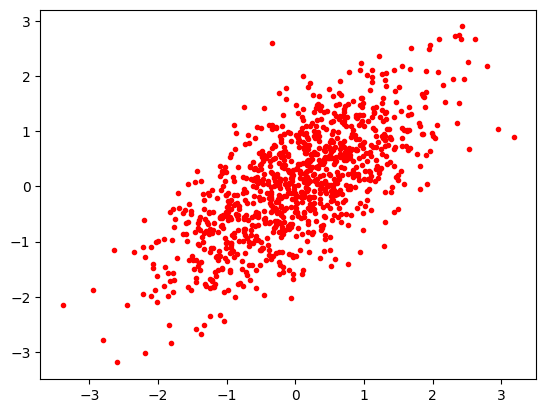

In [2]:
n = 1000
C = [[1,0.7],[0.7,1]]

A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.plot(Y[0,:], Y[1,:], 'r.')


# Mean centering

In [3]:
def mean_centering(X):
    mu = np.mean(X, axis=0)
    return X- np.ones((X.shape[0],2))*mu

Mean Centering for 20 2D samples, and visualize the resulting centered data

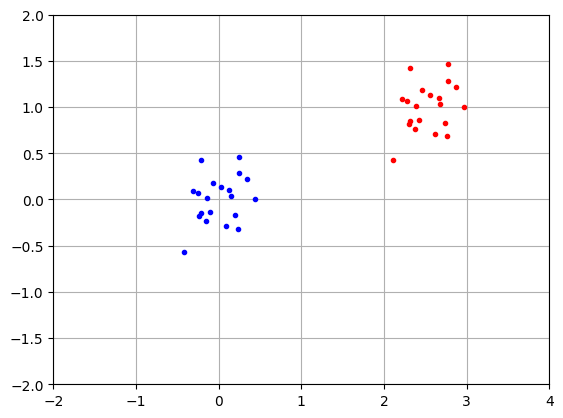

In [4]:
n=20
mu = [2.5, 1]
mu_add = np.ones((n,2))*mu
Xa = np.random.randn(n,2)*0.25
Xa = Xa + mu_add
Ya = mean_centering(Xa)

plt.plot(Xa[:,0], Xa[:,1], 'r.')
plt.plot(Ya[:,0], Ya[:,1], 'b.')
plt.axis([-2,4,-2,2]); plt.grid()

Mean Centering for 1000 2d samples, and check the centered data's inner product

In [5]:
#the original data's resulting covariance, Y includes 1000 samples
n = 1000
C = [[1,0.7],[0.7,1]]

A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)


C = np.cov(Y, bias=True)
print('Covariance of the data Y is: \n', C)

#mean centering
mu = np.mean(Y.T, axis=0)
Ya = Y.T- np.ones((Y.T.shape[0],2))*mu
Z = np.dot(Ya.T,Ya)
print('Inner product of centered Y is: \n', Z)

print('Are they proportional?')


Covariance of the data Y is: 
 [[0.99094533 0.71019393]
 [0.71019393 1.04173786]]
Inner product of centered Y is: 
 [[ 990.94533314  710.19393105]
 [ 710.19393105 1041.737863  ]]
Are they proportional?


# Principal axes of variation

283.8338143837708 [-0.72084783  0.69309336]


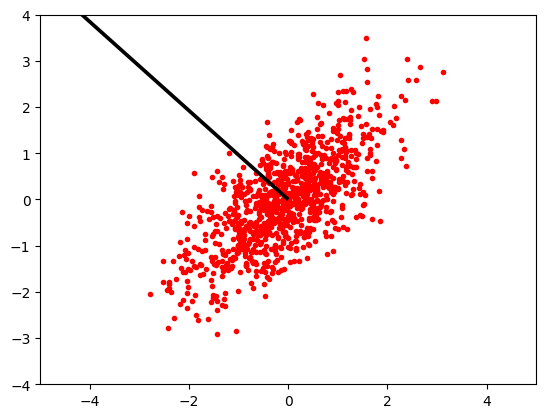

1629.8491405710106 [-0.69309336 -0.72084783]


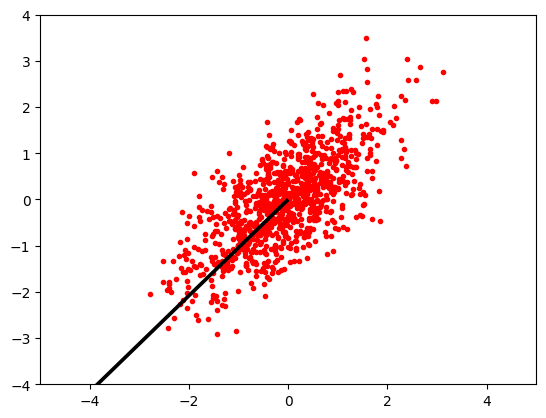

In [6]:
n=1000
Cb = [[1,0.7],[0.7,1]]
Ab = la.cholesky(Cb)
Xb = np.random.randn(n,2)
Yb = np.dot(Ab,Xb.T)

mu = np.mean(Yb.T, axis=0)
Ya = Yb.T- np.ones((Yb.T.shape[0],2))*mu

w,v = la.eig(np.dot(Ya.T,Ya))


for i in range(len(w)):
    
    plt.plot(Yb[0,:], Yb[1,:], 'r.', zorder=1)
    plt.axis([-5,5,-4,4])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', scale=(2.5/w[i]), zorder=2)
    plt.show()

# Linear Transform

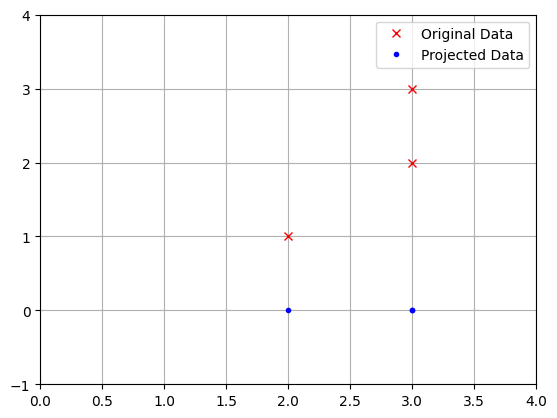

In [7]:
Xc = np.array([[2,1],[3,2],[3,3]])
P = np.array([[1,0],[0,0]]) #projects on to x axis
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'rx', label="Original Data")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Projected Data")
plt.axis([0,4,-1,4])
plt.grid()
plt.legend()

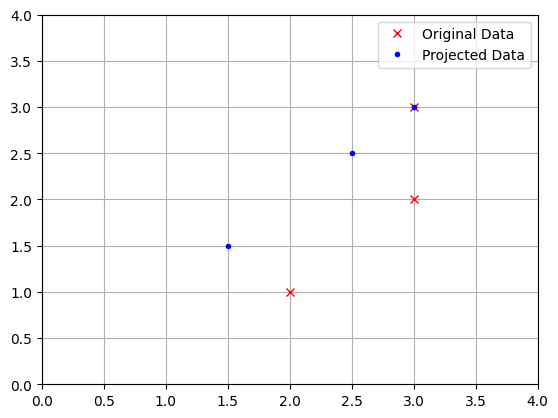

In [8]:
Xc = np.array([[2,1],[3,2],[3,3]])
P = np.array([[.5,.5],[.5,.5]]) #projects on to line x=y
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'rx', label="Original Data")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Projected Data")
plt.axis([0,4,0,4])
plt.grid()
plt.legend()

In [9]:
Xe = np.array([[2,1],[3,2],[3,3]])
X_mc = mean_centering(Xe)
Z = np.dot(X_mc.T,X_mc); w,v = la.eig(Z)
idx = w.argsort()[::-1]   #to sort the eig vals and vecs in to decending order
w = w[idx]; v = v[:,idx]

2.5351837584879964 [-0.47185793 -0.8816746 ]


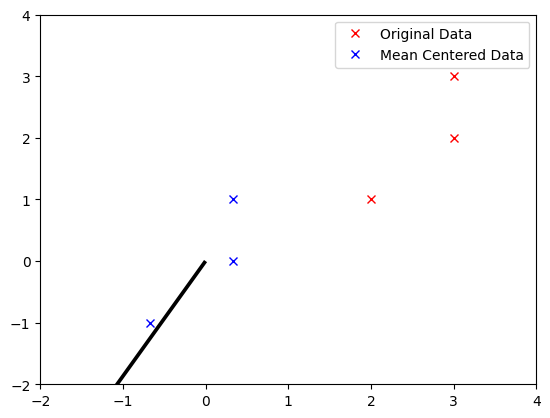

0.13148290817867014 [-0.8816746   0.47185793]


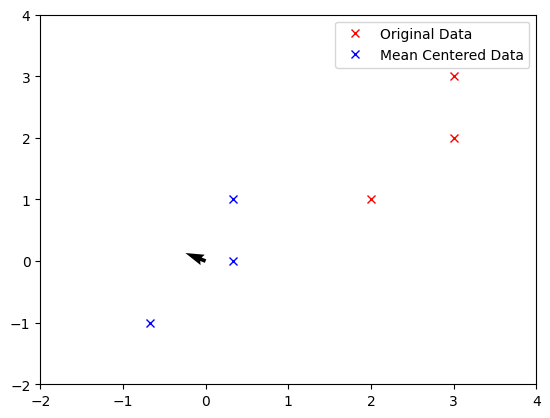

In [10]:
for i in range(len(w)):
    plt.plot(Xc[:,0], Xc[:,1], 'rx', label="Original Data")
    plt.plot(X_mc[:,0], X_mc[:,1], 'bx', label="Mean Centered Data")
    plt.axis([-2,4,-2,4]); plt.legend(); print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', scale=(3/w[i]), zorder=2); plt.show()

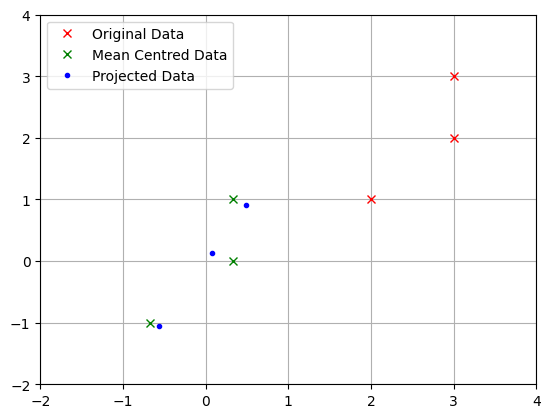

In [11]:
pa =v[:,0]
projection_matrix = np.outer(pa,pa.T) #P = aa^T to project along vector a
Xp = np.dot(Xe, projection_matrix)
Xp = mean_centering(Xp)
plt.plot(Xe[:,0], Xe[:,1], 'rx', label="Original Data")
plt.plot(X_mc[:,0], X_mc[:,1], 'gx', label="Mean Centred Data")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Projected Data")
plt.axis([-2,4,-2,4])
plt.grid()
plt.legend()

Singular value decomposition

1629.849140571011 [-0.69309336  0.72084783]


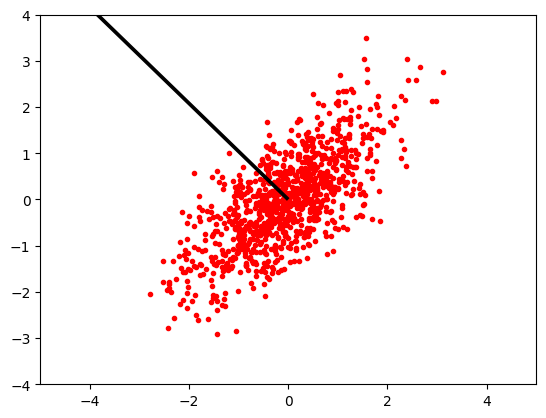

283.83381438377086 [-0.72084783 -0.69309336]


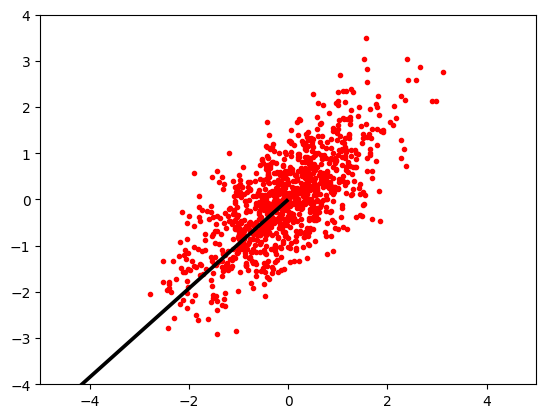

In [12]:
u, s, vh = la.svd(Ya)

for i in range(len(s)):
    
    plt.plot(Yb[0,:], Yb[1,:], 'r.', zorder=1)
    plt.axis([-5,5,-4,4])
    print(s[i]*s[i], vh[:,i])
    plt.quiver(0,0, vh[:,i][0], vh[:,i][1], angles = 'xy', scale=(2.5/(s[i]*s[i])), zorder=2)
    plt.show()